# SNAX (SuperNova Analysis in XENON)

This notebook describes the main usage of the `snax` package. <br>

> Last updated: 26/07/2023 <br>

The code is modular so that it can be integrated into different studies smoothly. <br>

Main concept is that there are ~4 main ingredients. <br>
 - `snewpy.models.ccsn` the core collapse supernova simulation collection from the snewpy package
 - `snax.Supernova_Models.Models` Wrapper around the `snewpy` models, defines the _snax models_
 - `snax.Nucleus` creates a Xenon atom, pure or isotope, computes cross sections
 - `snax.interactions` accepts a model, and creates a nuclei to handle the interactions.


We select a model from `snewpy` then create a `snax` model by adding several more attributes. Then, we can create an `interaction` object which defines target-specific quantities such as the number of elements based on the target volume or the distance to the target. <br>
By having a modular flow one can study different aspects.

### Models
Let's have a look at the Supernova Models

In [54]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from snewpy.neutrino import Flavor
from snax.Supernova_Models import Models
from snax.Plotter import Plotter
from snax.interactions import Interactions
from astropy import units as u
from snewpy.models.ccsn import Bollig_2016, Analytic3Species, Fornax_2021, Nakazato_2013

## On Local Machine

We need a configuration file to tell us where the snewpy models are saved, where you as the user want to save the snax models and interactions. This way, next time you run, it will just fetch the previously computed models. The distances and the volumes can still be scaled.

We create a local `mma_folder` and create a local temporary configuration file to work locally.

In [55]:
import configparser
import os

if not os.path.isdir("mma_data"):
    os.mkdir("mma_data")
    
if not os.path.isfile("mma_data/temp_config.config"):
    config = configparser.ConfigParser()
    config['paths'] = {'snewpy_models': './mma_data/SNEWPY_models/',
                       'processed_data': './mma_data/',}
    config['wfsim'] = {'instruction_path': './mma_data/',
                       'sim_folder': './mma_data/',}
    with open('./mma_data/temp_config.config', 'w') as configfile:
        config.write(configfile)
    print(f"Created mma_data/temp_config.config")
    print("Either save the snewpy models you want under mma_data/SNEWPY_models/ or change the path in the config")
print("You can use `snewpy.get_models(models=['Bollig_2016', 'Nakazato_2013'], download_dir='mma_data')`")

You can use `snewpy.get_models(models=['Bollig_2016', 'Nakazato_2013'], download_dir='mma_data')`


In [56]:
# snewpy.get_models(models=['Fornax_2021'], download_dir='mma_data')

In [57]:
!ls ./mma_data/SNEWPY_models/

Bollig_2016  Fornax_2021  Nakazato_2013


In [58]:
snewpy_models_path = "./mma_data/SNEWPY_models/"

Now let's load the snewpy model, make a snax model out of that, and compute the integrated fluxes. Then we can also create an interaction object using which we can compute interaction rates.

### Nakazato 2013

In [59]:
# snewpy model
_N13_m13 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s13.0.fits")
N13_m13 = Models(_N13_m13, save_name='N13_m13', config_file="temp_config.config")
# compute/fetch fluxes
N13_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_m13.scale_fluxes(distance=10);
# interactions
Int_N13 = Interactions(N13_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_N13.compute_interaction_rates()                                                           # compute rates
Int_N13.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol
############################################
# snewpy model
_N13_m50 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s50.0.fits")
N13_m50 = Models(_N13_m50, save_name='N13_m50', config_file="temp_config.config")
# compute/fetch fluxes
N13_m50.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_m50.scale_fluxes(distance=10);
# interactions
Int_N50 = Interactions(N13_m50, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_N50.compute_interaction_rates()                                                           # compute rates
Int_N50.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vo
############################################
# snewpy model
_N13_BHshen = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-BH-z0.004-s30.0.fits")
N13_BHshen = Models(_N13_BHshen, save_name='N13_BHshen', config_file="temp_config.config")
# compute/fetch fluxes
N13_BHshen.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_BHshen.scale_fluxes(distance=10);
# interactions
Int_BHshen = Interactions(N13_BHshen, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_BHshen.compute_interaction_rates()                                                           # compute rates
Int_BHshen.scale_rates(distance=10, volume=5.9);  # scale rates for dist & v
############################################
# snewpy model
_N13_BHLS220 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.fits")
N13_BHLS220 = Models(_N13_BHLS220, save_name='N13_BHLS220', config_file="temp_config.config")
# compute/fetch fluxes
N13_BHLS220.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_BHLS220.scale_fluxes(distance=10);
# interactions
Int_BHLS220 = Interactions(N13_BHLS220, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_BHLS220.compute_interaction_rates()                                                           # compute rates
Int_BHLS220.scale_rates(distance=10, volume=5.9);  # scale rates for dist & v

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> N13_m13.pkl
> Retrieving object self.storageN13_m13.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/N13_m13_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> N13_m50.pkl
> Retrieving object self.storageN13_m50.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/N13_m50_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> N13_BHshen.pkl
> Retrieving object self.storageN13_BHshen.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/N13_BHshen_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> N13_BHLS220.pkl
> Retrieving object self.storageN13_BHLS220.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/N13_BHLS220_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


### Bollig 2016

In [47]:
_B16_m11 = Bollig_2016(filename=snewpy_models_path+"Bollig_2016/s11.2c")
B16_m11 = Models(_B16_m11, save_name='B16_m11', config_file="temp_config.config")
B16_m11.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
B16_m11.scale_fluxes(distance=10)
Int_B11 = Interactions(B16_m11, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_B11.compute_interaction_rates()                                                           # compute rates
Int_B11.scale_rates(distance=10, volume=5.9)  # scale rates for dist & vol
#####################################
_B16_m27 = Bollig_2016(filename=snewpy_models_path+"Bollig_2016/s27.0c")
B16_m27 = Models(_B16_m27, save_name='B16_m27', config_file="temp_config.config")
B16_m27.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
B16_m27.scale_fluxes(distance=10);
Int_B27 = Interactions(B16_m27, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_B27.compute_interaction_rates()                                                           # compute rates
Int_B27.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> B16_m11.pkl
> Retrieving object self.storageB16_m11.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/B16_m11_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> B16_m27.pkl
> Retrieving object self.storageB16_m27.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/B16_m27_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


### Fornax 2021

In [48]:
_F21_m13 = Fornax_2021(filename=snewpy_models_path+"Fornax_2021/lum_spec_13M_r10000_dat.h5")
F21_m13 = Models(_F21_m13, save_name='F21_m13', config_file="temp_config.config")
F21_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
F21_m13.scale_fluxes(distance=10)
Int_F13 = Interactions(F21_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_F13.compute_interaction_rates()                                                           # compute rates
Int_F13.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol
###############################################
_F21_m27 = Fornax_2021(filename=snewpy_models_path+"Fornax_2021/lum_spec_26.99M_r10000_dat.h5")
F21_m27 = Models(_F21_m27, save_name='F21_m27', config_file="temp_config.config")
F21_m27.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
F21_m27.scale_fluxes(distance=10)
Int_F27 = Interactions(F21_m27, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_F27.compute_interaction_rates()                                                           # compute rates
Int_F27.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/F21_m13.pkl!



Looping:   0%|          | 0/4869 [00:00<?, ?it/s]

> Saved at <self.storage>/F21_m13.pkl!

> Saved at <self.storage>/F21_m13_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/F21_m27.pkl!



Looping:   0%|          | 0/4916 [00:00<?, ?it/s]

> Saved at <self.storage>/F21_m27.pkl!

> Saved at <self.storage>/F21_m27_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


## On dali/midway

In [17]:
# # default config (ie. SN_Nakazato.default_conf_path) already points to common storages
# # snewpy model
# _N13_m13 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s13.0.fits")
# N13_m13 = Models(_N13_m13, save_name='N13_m13')
# # compute/fetch fluxes
# N13_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
# N13_m13.scale_fluxes(distance=10);
# # interactions
# Int_N13 = Interactions(N13_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
# Int_N13.compute_interaction_rates()                                                           # compute rates
# Int_N13.scale_rates(distance=10, volume=5.9);

## Check out the models and the interactions

We loaded a snewpy model and created a SNAX model from that, using this we also generated an interaction object.

In [23]:
# snewpy object
_N13_m13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|

In [25]:
# SNAX model
N13_m13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|
|file name| N13_m13.pkl
|duration | 20.05 s|
|time range| (-0.05 s, 20.0 s)

In [26]:
N13_m13.storage, N13_m13.user, N13_m13.model_name, N13_m13.object_name

('/mnt/c/Users/bj7780/Desktop/Kara/GitHub/XENON/multimessenger/notebooks',
 'kara-unix',
 'loaders',
 'N13_m13.pkl')

In [28]:
# interaction object
Int_N13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|
|file name| N13_m13.pkl
|duration | 20.05 s|
|time range| (-0.05 s, 20.0 s)
|Interaction file| N13_m13_interaction.pickle
|Target | mix Xenon
|Computed, scaled | True, True
|distance | 10.0 kpc
|volume | 5.9 t
|Expected Total | 73 ct

In [33]:
Int_N13.interaction_file, Int_N13.volume, Int_N13.distance, Int_N13.expected_total['Total']

('N13_m13_interaction.pickle',
 <Quantity 5.9 t>,
 <Quantity 10. kpc>,
 <Quantity 73.30905244 ct>)

- We can now compute the fluxes and scale them at any distance. 

In [35]:
Int_N13.scale_rates(distance=7, volume=50);
Int_N13.interaction_file, Int_N13.volume, Int_N13.distance, Int_N13.expected_total['Total']

('N13_m13_interaction.pickle',
 <Quantity 50. t>,
 <Quantity 7. kpc>,
 <Quantity 1267.88399246 ct>)

## Look at the models

In [67]:
# scale back
Int_N13.scale_rates(distance=10, volume=5.9);

In [68]:
models_list = [N13_m13, N13_m50, N13_BHshen, N13_BHLS220, B16_m11, B16_m27, F21_m13, F21_m27]
interactions_list = [Int_N13, Int_N50, Int_BHshen, Int_BHLS220, Int_B11, Int_B27, Int_F13, Int_F27]

models = {i.object_name:i for i in models_list}
interactions = {i.Model.object_name:i for i in interactions_list}

In [69]:
import matplotlib.pyplot as plt

(5e-06, 44.00322447797172)

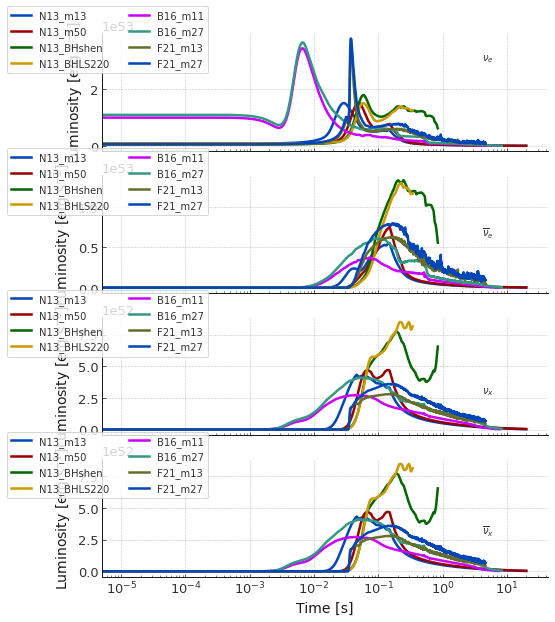

In [70]:
fig, axes = plt.subplots(nrows=4, figsize=(8,10), sharex=True)

for i, f in enumerate(Flavor):
    axes[i].set_ylabel('Luminosity [erg s$^{-1}$]')
    axes[i].set_xscale('log')
    for k,v in models.items():
        l = axes[i].plot(v.times, v.model.luminosity[f], label=k.split('.')[0])
    axes[i].legend(fontsize=10, ncol=2, bbox_to_anchor=(0.25, 0.62));
    axes[i].text(0.9*np.max(v.times.value), 0.8*np.max(v.model.luminosity[f].value), f.to_tex())
    
axes[-1].set_xlabel('Time [s]');
axes[-1].set_xlim(5e-6, None)

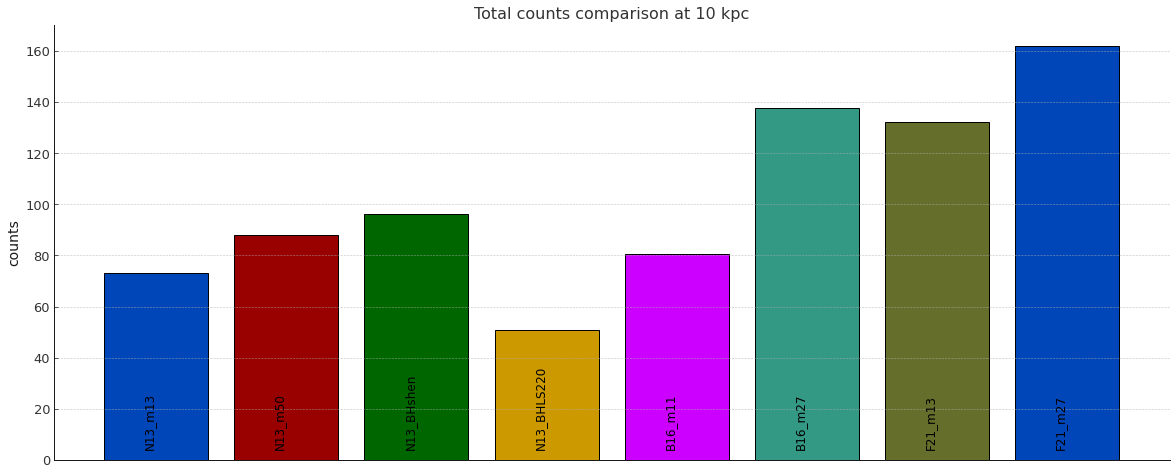

In [71]:
plt.figure(figsize=(20,8))
expected_counts = [v.expected_total['Total'].value for v in interactions.values()]
plt.title("Total counts comparison at 10 kpc")
for i, k in enumerate(models.keys()):
#     plt.bar(np.arange(len(models)), expected_counts, color='dodgerblue')
    plt.bar(i, expected_counts[i], ec='k') #  color=cmap[i], 
    plt.text(i-0.1, 5, k.split('.')[0], rotation=90, fontsize=12, color='k')
plt.ylabel('counts')
plt.xticks([]);

In [72]:
cmap = plt.cm.jet(np.linspace(0,1,len(models)))

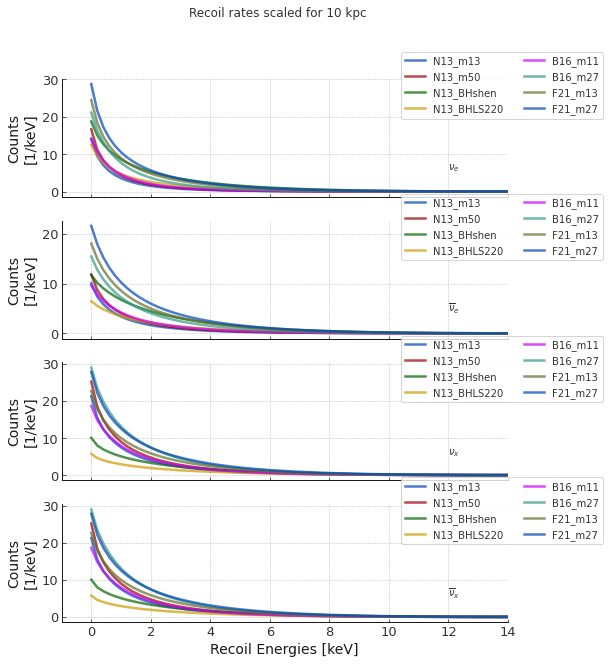

In [73]:
fig, axes = plt.subplots(nrows=4, figsize=(8,10), sharex=True)
plt.suptitle('Recoil rates scaled for 10 kpc')
for i, f in enumerate(Flavor):
    axes[i].set_ylabel('Counts\n[1/keV]')
    for j, (k,v) in enumerate(interactions.items()):
        l = axes[i].plot(v.recoil_energies, v.rates_per_recoil_scaled[f], label=k.split('.')[0], alpha=0.7,) # color=cmap[j])
    axes[i].legend(fontsize=10, ncol=2, bbox_to_anchor=(0.75, 0.62));
    axes[i].text(0.6*np.max(v.recoil_energies.value), 0.2*np.max(v.rates_per_recoil_scaled[f].value), f.to_tex())
    axes[i].set_xlim(None, 14)
axes[-1].set_xlabel('Recoil Energies [keV]');

## Target

In [75]:
from snax.Nucleus import Target
from snax.Xenon_Atom import ATOM_TABLE

In [76]:
print("Target we load", ATOM_TABLE['Xe131'])
singleXe = Target(ATOM_TABLE['Xe131'], pure=True) # pure means setting the abundance to =1 
singleXe

Target we load {'Type': 'Xe131', 'MassNum': 131, 'AtomicNum': 54, 'Mass': 130.90508406, 'Spin': 1.5, 'Fraction': 0.212324}


### The Target<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Values</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Type</th>
      <td>Xe131</td>
    </tr>
    <tr>
      <th>MassNum</th>
      <td>131</td>
    </tr>
    <tr>
      <th>AtomicNum</th>
      <td>54</td>
    </tr>
    <tr>
      <th>Mass</th>
      <td>130.905084</td>
    </tr>
    <tr>
      <th>Spin</th>
      <td>1.5</td>
    </tr>
    <tr>
      <th>Fraction</th>
      <td>0.212324</td>
    </tr>
  </tbody>
</table>
</div><br>


In [77]:
recoil_en = np.linspace(0,30,100) * u.keV
neutrino_en = B16_m11.neutrino_energies

formfac = singleXe.form_factor(np.linspace(0,150,100) * u.keV)
crosssec = singleXe.nN_cross_section(neutrino_en, recoil_en)

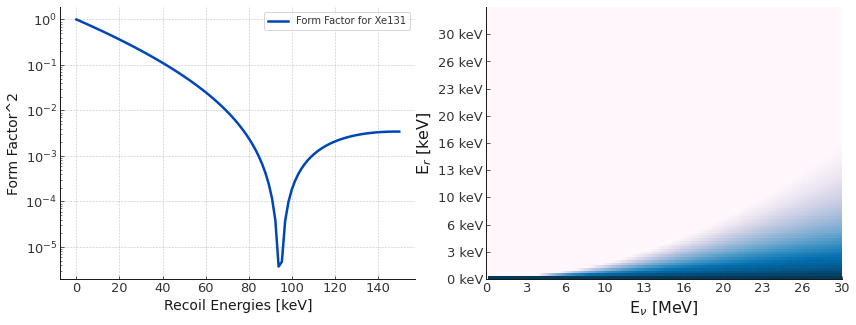

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
ax1.semilogy(np.linspace(0,150,100) * u.keV, formfac**2, label='Form Factor for Xe131');
ax1.set_xlabel(f'Recoil Energies [{recoil_en.unit}]')
ax1.set_ylabel('Form Factor^2')
ax1.legend();

ax2.grid(False)
cb = ax2.pcolormesh(crosssec * 1e43, cmap='PuBu') #, norm=LogNorm())
ax2.set_xlabel(r'E$_\nu$ [MeV]', fontsize=16)
ax2.set_ylabel(r'E$_r$ [keV]', fontsize=16)
ax2.set_xticks(ticks=np.linspace(0, crosssec.shape[1], 10), labels=np.linspace(neutrino_en[0], neutrino_en[-1], 10, dtype=int).value)
ax2.set_yticks(ticks=np.arange(0, crosssec.shape[0], 10), labels=np.linspace(recoil_en[0], recoil_en[-1], 10, dtype=int));

## Interactions

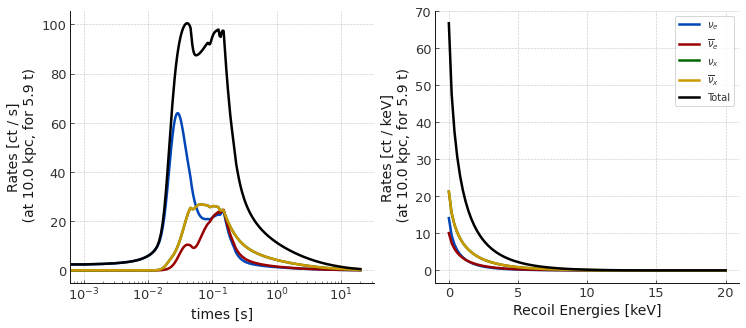

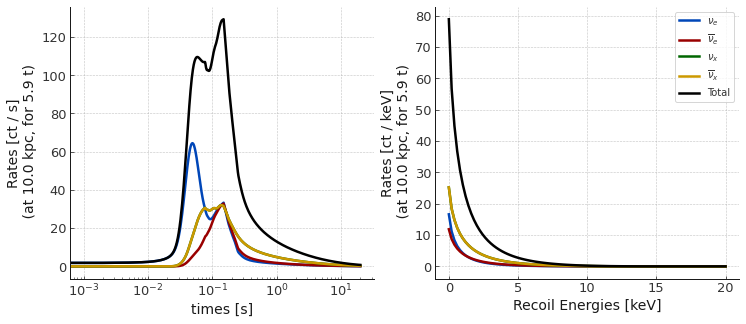

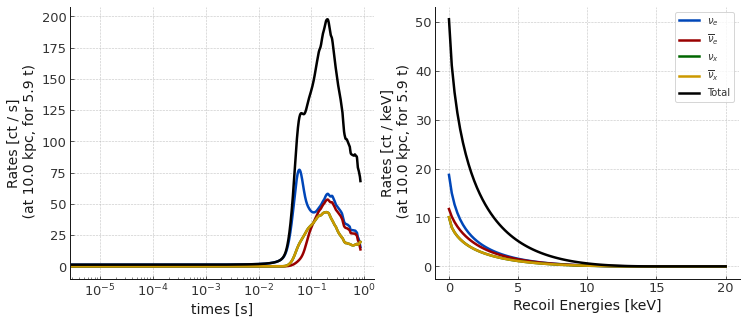

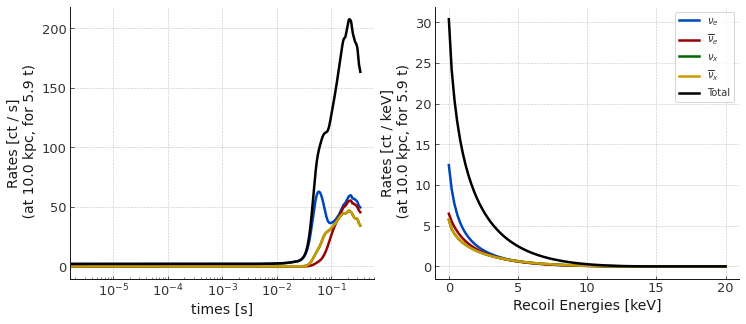

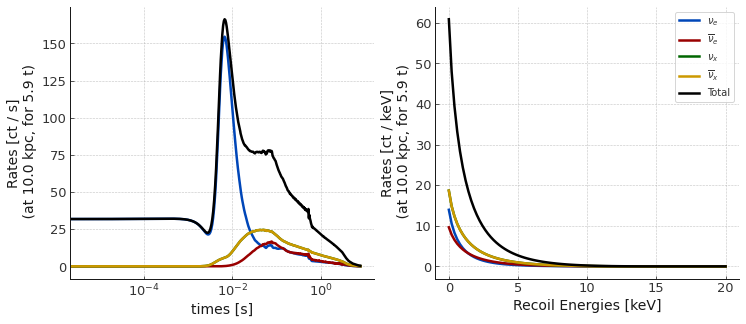

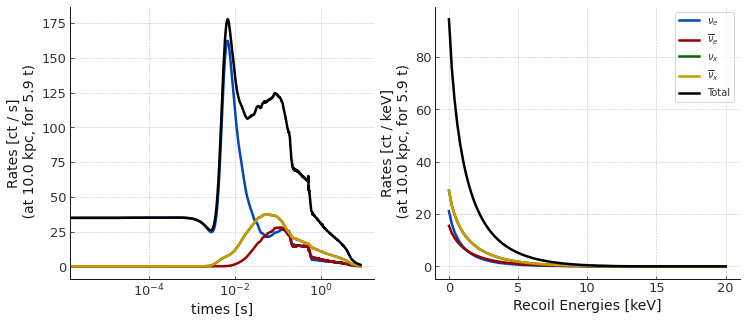

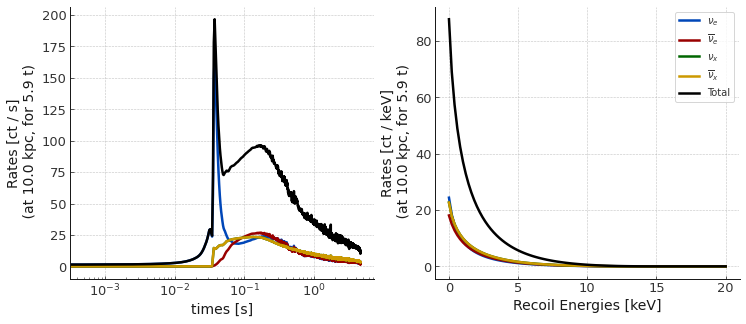

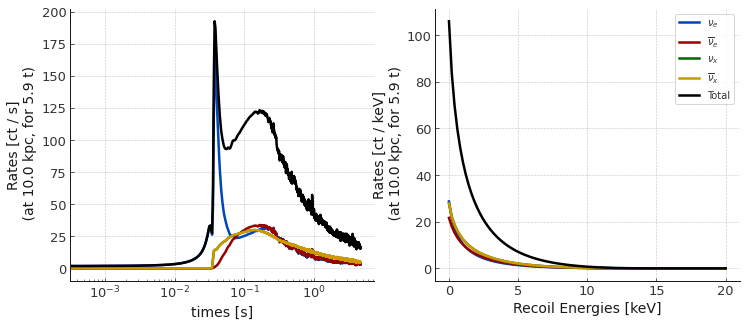

In [87]:
for m in interactions.values():
    m.plot_rates()